In [72]:
import networkx as nx  # Графын сүлжээний анализ хийх NetworkX сан
import warnings  # Анхааруулга дарахад ашиглана
import numpy as np  # Тоон өгөгдөл боловсруулах NumPy сан
import random  # Санамсаргүй тоо үүсгэх модуль
import matplotlib.pyplot as plt  # График дүрслэл хийх Matplotlib сан
import matplotlib.colors as mcolors  # Өнгөний тохиргоо хийх Matplotlib сан
warnings.filterwarnings('ignore')  # Анхааруулга гаргахгүй байх тохиргоо

In [73]:
%matplotlib inline

In [74]:
def read_net(filename):  # Граф унших функц
    g = nx.Graph()  # Чиглэлгүй граф үүсгэх
    with open(filename) as f:  # Файл нээх
        f.readline()  # Эхний мөрийг алгасах (гарчиг байж магадгүй)
        for l in f:  # Бүх мөрийг унших
            l = l.split(",")  # Мөрийг таслалаар хуваах
            g.add_edge(l[0], l[1])  # Хоёр зангилаа хооронд ирмэг нэмэх
    return g  # Графыг буцаах

# Game of Thrones data
tseason = 6  # Сонгосон улирал
g = read_net(f'/content/got-s6-edges.csv')  # Граф өгөгдлийг унших

houses = {}  # Гэр бүлүүдийг хадгалах
with open(f'/content/got-s6-nodes.csv') as f:  # Файл унших
    for l in f:  # Бүх мөрийг унших
        node, _, house = l.rstrip().split(",")  # Зангилаа болон гэр бүлийг авах
        g.add_node(node, house=house)  # Зангилааг графд нэмэх

# Node position for plotting
pos = nx.spring_layout(g)  # Графын зангилаануудын байршлыг тодорхойлох

In [75]:
def draw_net(G, pos, measures, measure_name):  # Графыг дүрслэх функц
    plt.figure(figsize=(20,20))  # Зурагны хэмжээ томруулах
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,  # Зангилаануудыг зурах
                               node_color=list(measures.values()), nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))  # Өнгөний тохиргоо
    nx.draw_networkx_labels(G, pos)  # Шошго нэмэх
    nx.draw_networkx_edges(G, pos, alpha=0.2)  # Ирмэгүүдийг зурах
    plt.title(measure_name)  # Гарчиг тавих
    plt.colorbar(nodes)  # Өнгөний тайлбар нэмэх
    plt.axis('off')  # Тэнхлэгийг нуух
    plt.show()  # Графыг харуулах

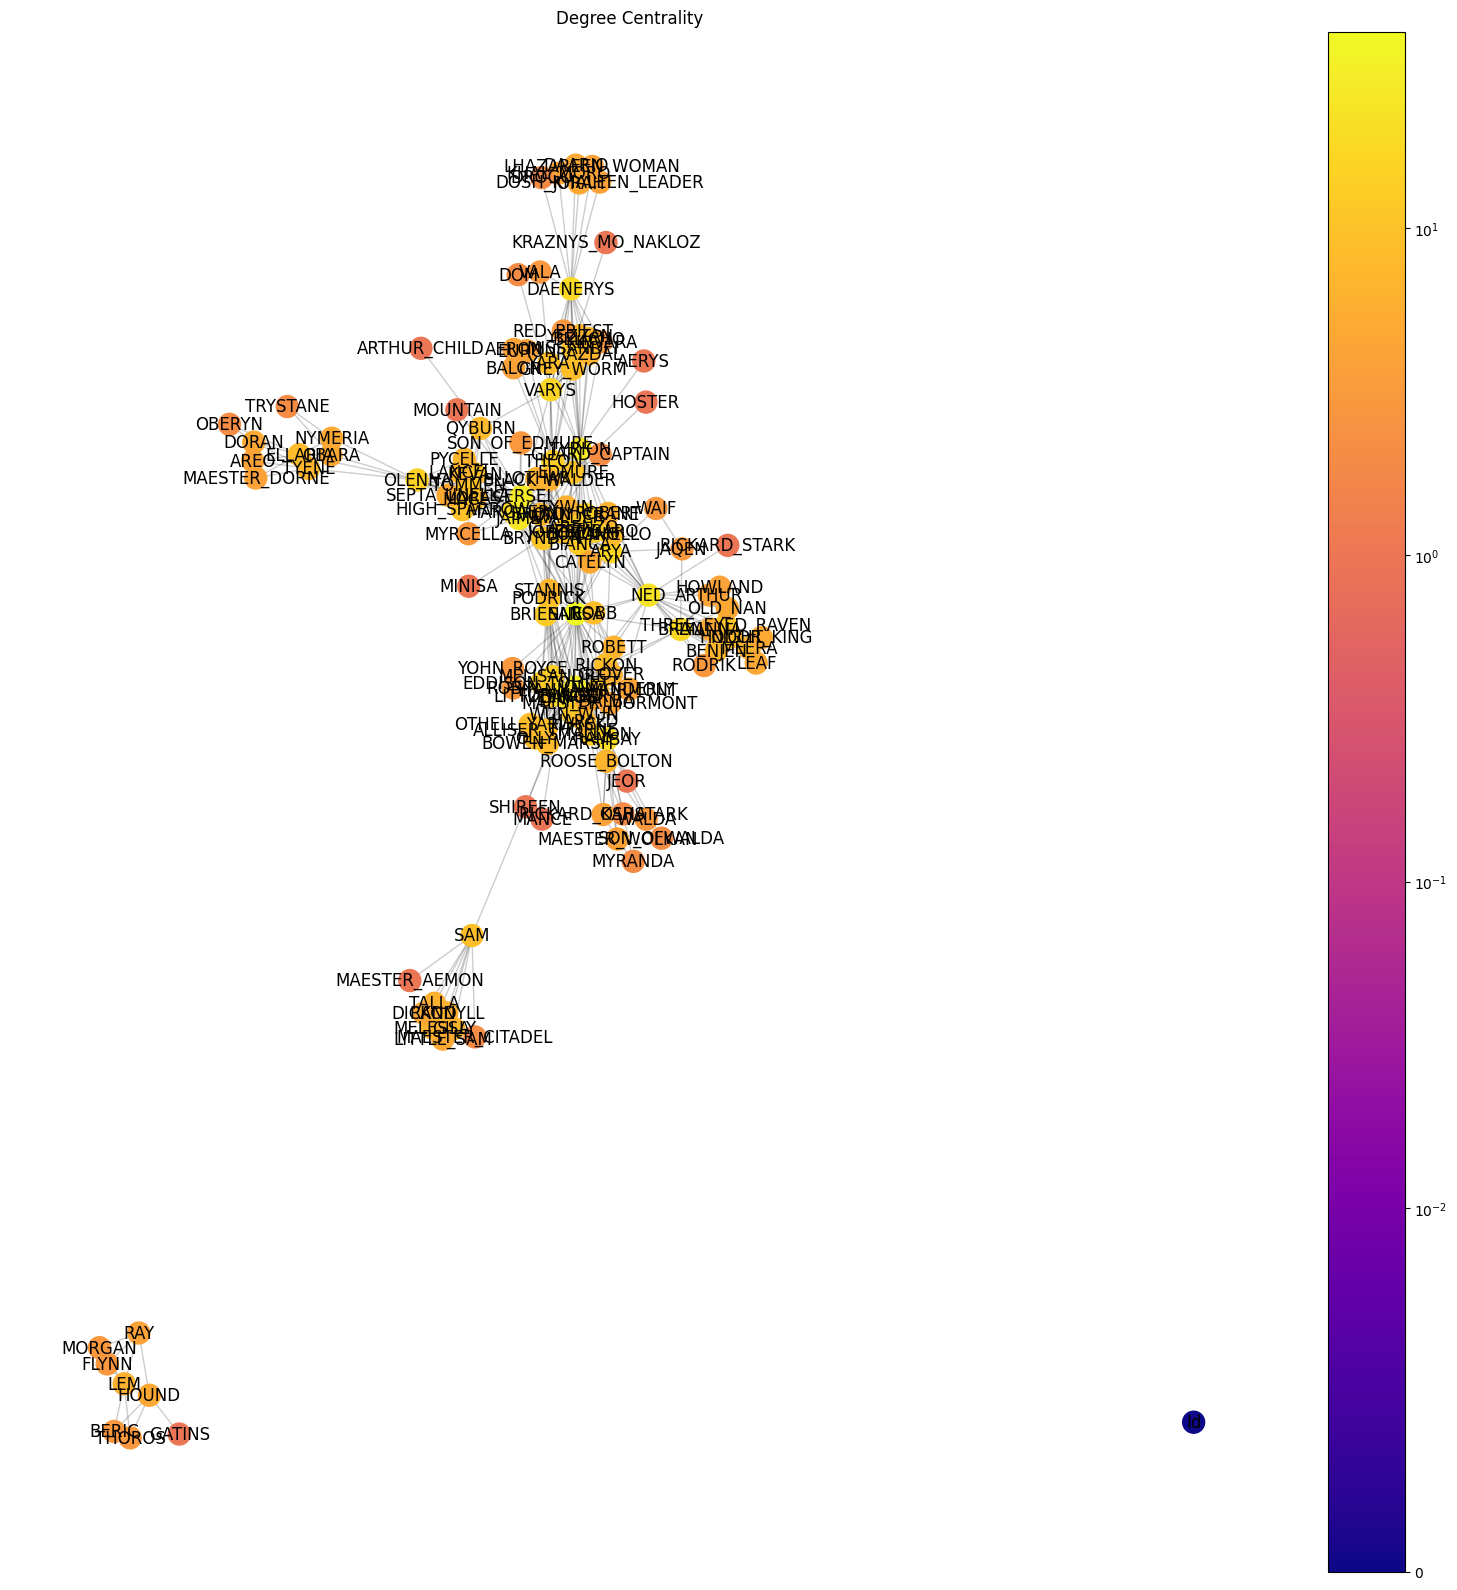

In [76]:
degrees = dict(g.degree())  # Графын зангилаануудын зэрэг (degree) тооцоолох

ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]  # Зангилаануудыг зэргийн дагуу бууруулан эрэмбэлэх
ranks[0:5]  # Хамгийн өндөр зэрэгтэй 5 зангилааг авах

# Example output:
# [('SANSA', 40), ('JON', 31), ('CERSEI', 27), ('TYRION', 26), ('JAIME', 24)]  # Жишээ үр дүн

draw_net(g, pos, degrees, 'Degree Centrality')  # Зэрэг төвшингийн дагуу графыг дүрслэх


In [77]:
closeness = nx.closeness_centrality(g)  # Графын бүх зангилааны ойр байдлын төвшинг (closeness centrality) тооцоолох

In [78]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]  # `closeness` dictionary-г value дээр үндэслэн буурч буйгаар эрэмбэлнэ
ranks[0:5]  # Эхний 5 хамгийн өндөр `closeness` утгатай элементүүдийг авна


[('SANSA', 0.480966882375333),
 ('TYRION', 0.42661103607949064),
 ('JON', 0.4208460220784164),
 ('CERSEI', 0.4152347417840376),
 ('JAIME', 0.41112350671686887)]

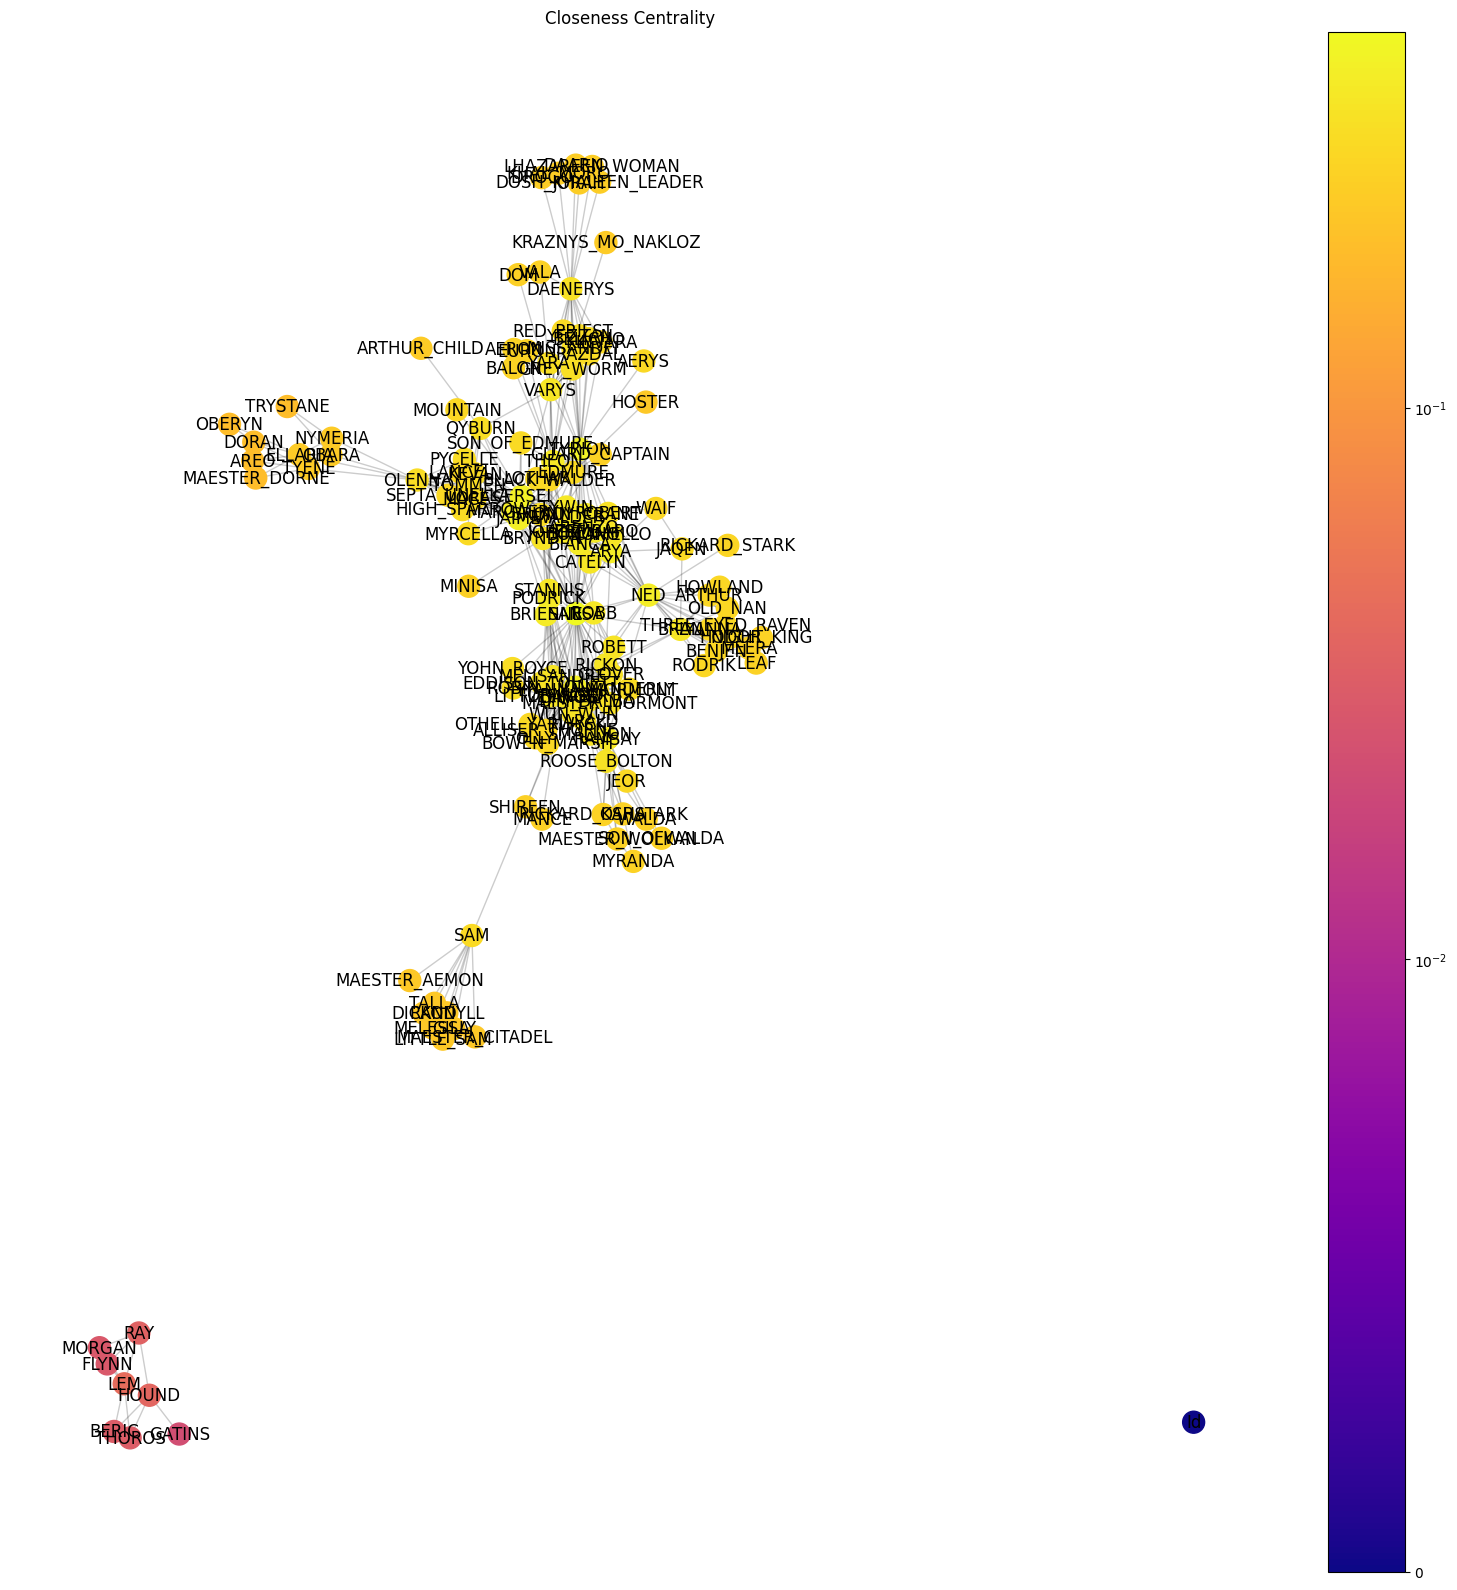

In [79]:
draw_net(g, pos, closeness, 'Closeness Centrality')  # `closeness centrality`-г ашиглан графыг дүрслэнэ

In [80]:
betweenness = nx.betweenness_centrality(g)  # Бүх оройгийн `betweenness centrality`-г тооцоолно

In [81]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]  # `betweenness centrality` утгуудыг буурах дарааллаар эрэмбэлнэ
ranks[0:5]  # Хамгийн өндөр `betweenness centrality`-тэй эхний 5 оройг авна

[('SANSA', 0.2589247706776543),
 ('JON', 0.18865041688178846),
 ('TYRION', 0.14643956731944027),
 ('JAIME', 0.12861223368885352),
 ('CERSEI', 0.1155676152654065)]

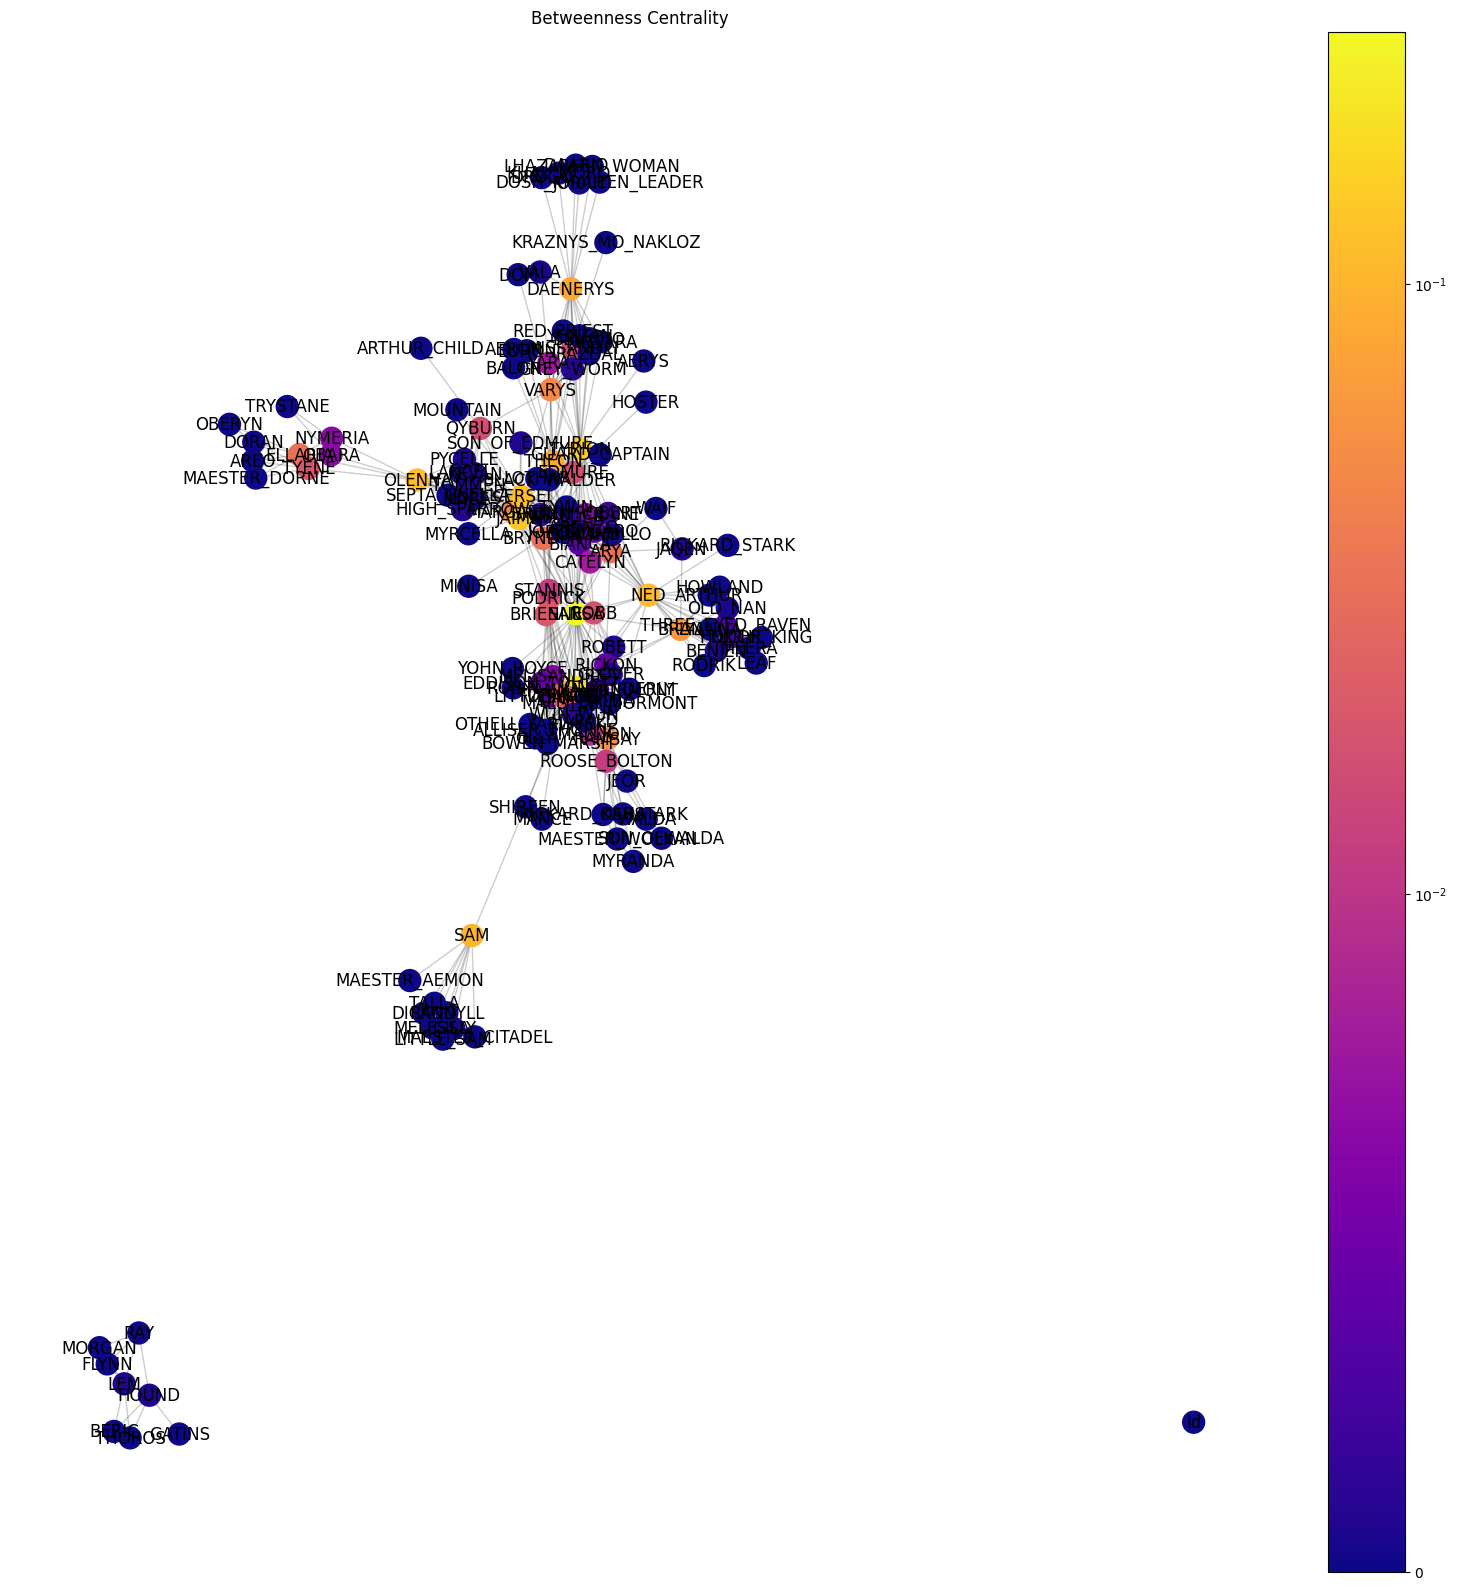

In [82]:
draw_net(g, pos, betweenness, 'Betweenness Centrality')  # `betweenness centrality`-г ашиглан графыг дүрслэнэ

In [83]:
harmonic = nx.harmonic_centrality(g) # Бүх оройгийн `harmonic centrality`-г тооцоолно

In [84]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]  # `harmonic centrality` утгуудыг буурах дарааллаар эрэмбэлнэ
ranks[0:5]  # Хамгийн өндөр `harmonic centrality`-тэй эхний 5 оройг авна


[('SANSA', 81.41666666666667),
 ('JON', 73.33333333333336),
 ('TYRION', 71.91666666666667),
 ('CERSEI', 70.50000000000003),
 ('JAIME', 69.00000000000003)]

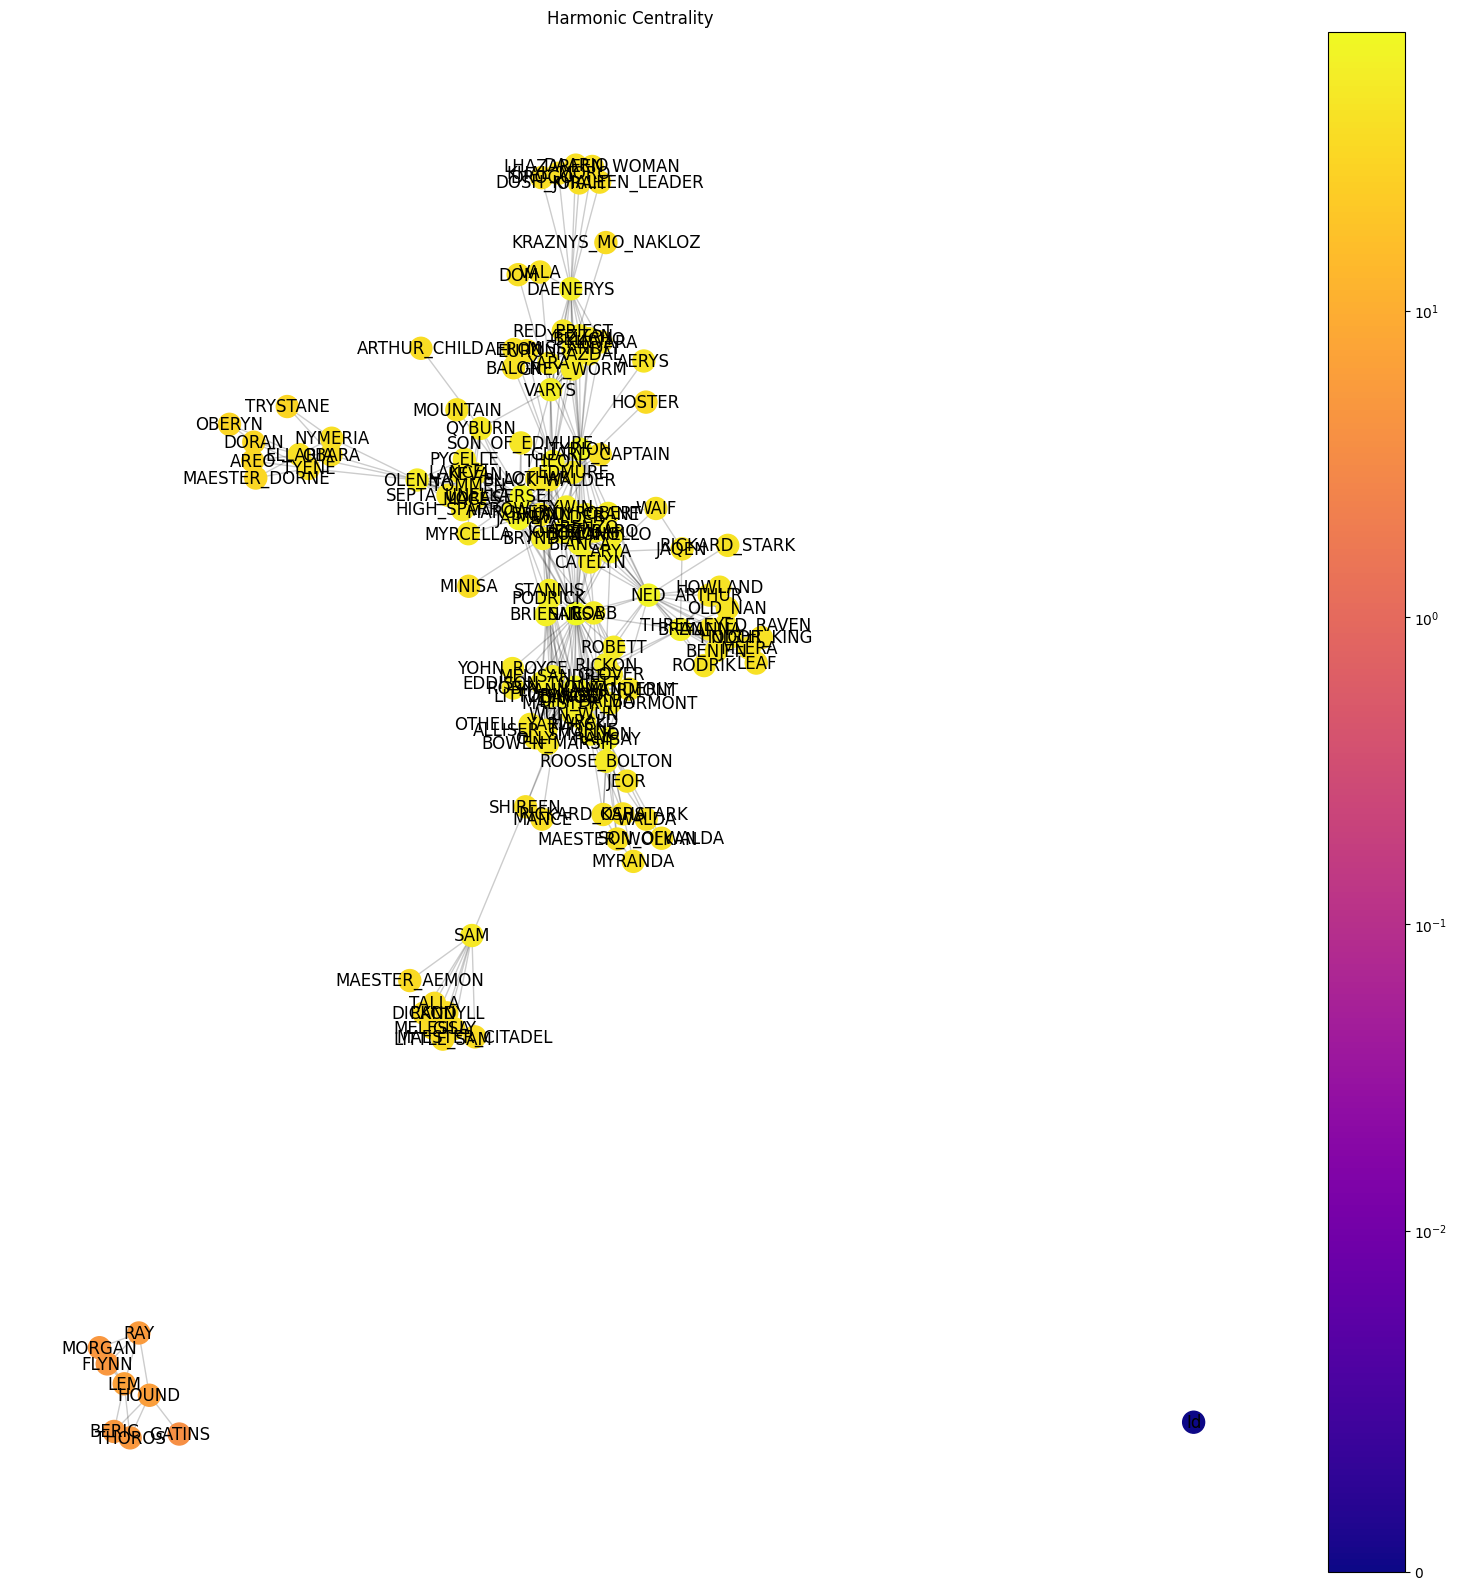

In [85]:
draw_net(g, pos, harmonic, 'Harmonic Centrality')  # `harmonic centrality`-г ашиглан графыг дүрслэнэ

In [86]:
pagerank = nx.pagerank(g)  # Графын бүх оройгийн PageRank утгыг тооцоолно

In [87]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]  # `pagerank` утгуудыг буурах дарааллаар эрэмбэлнэ
ranks[0:5]  # Хамгийн өндөр `pagerank`-тай эхний 5 оройг авна

[('SANSA', 0.0283610781602461),
 ('JON', 0.02336620768889073),
 ('CERSEI', 0.020257175030860622),
 ('TYRION', 0.0201675946416887),
 ('JAIME', 0.01853234006464307)]

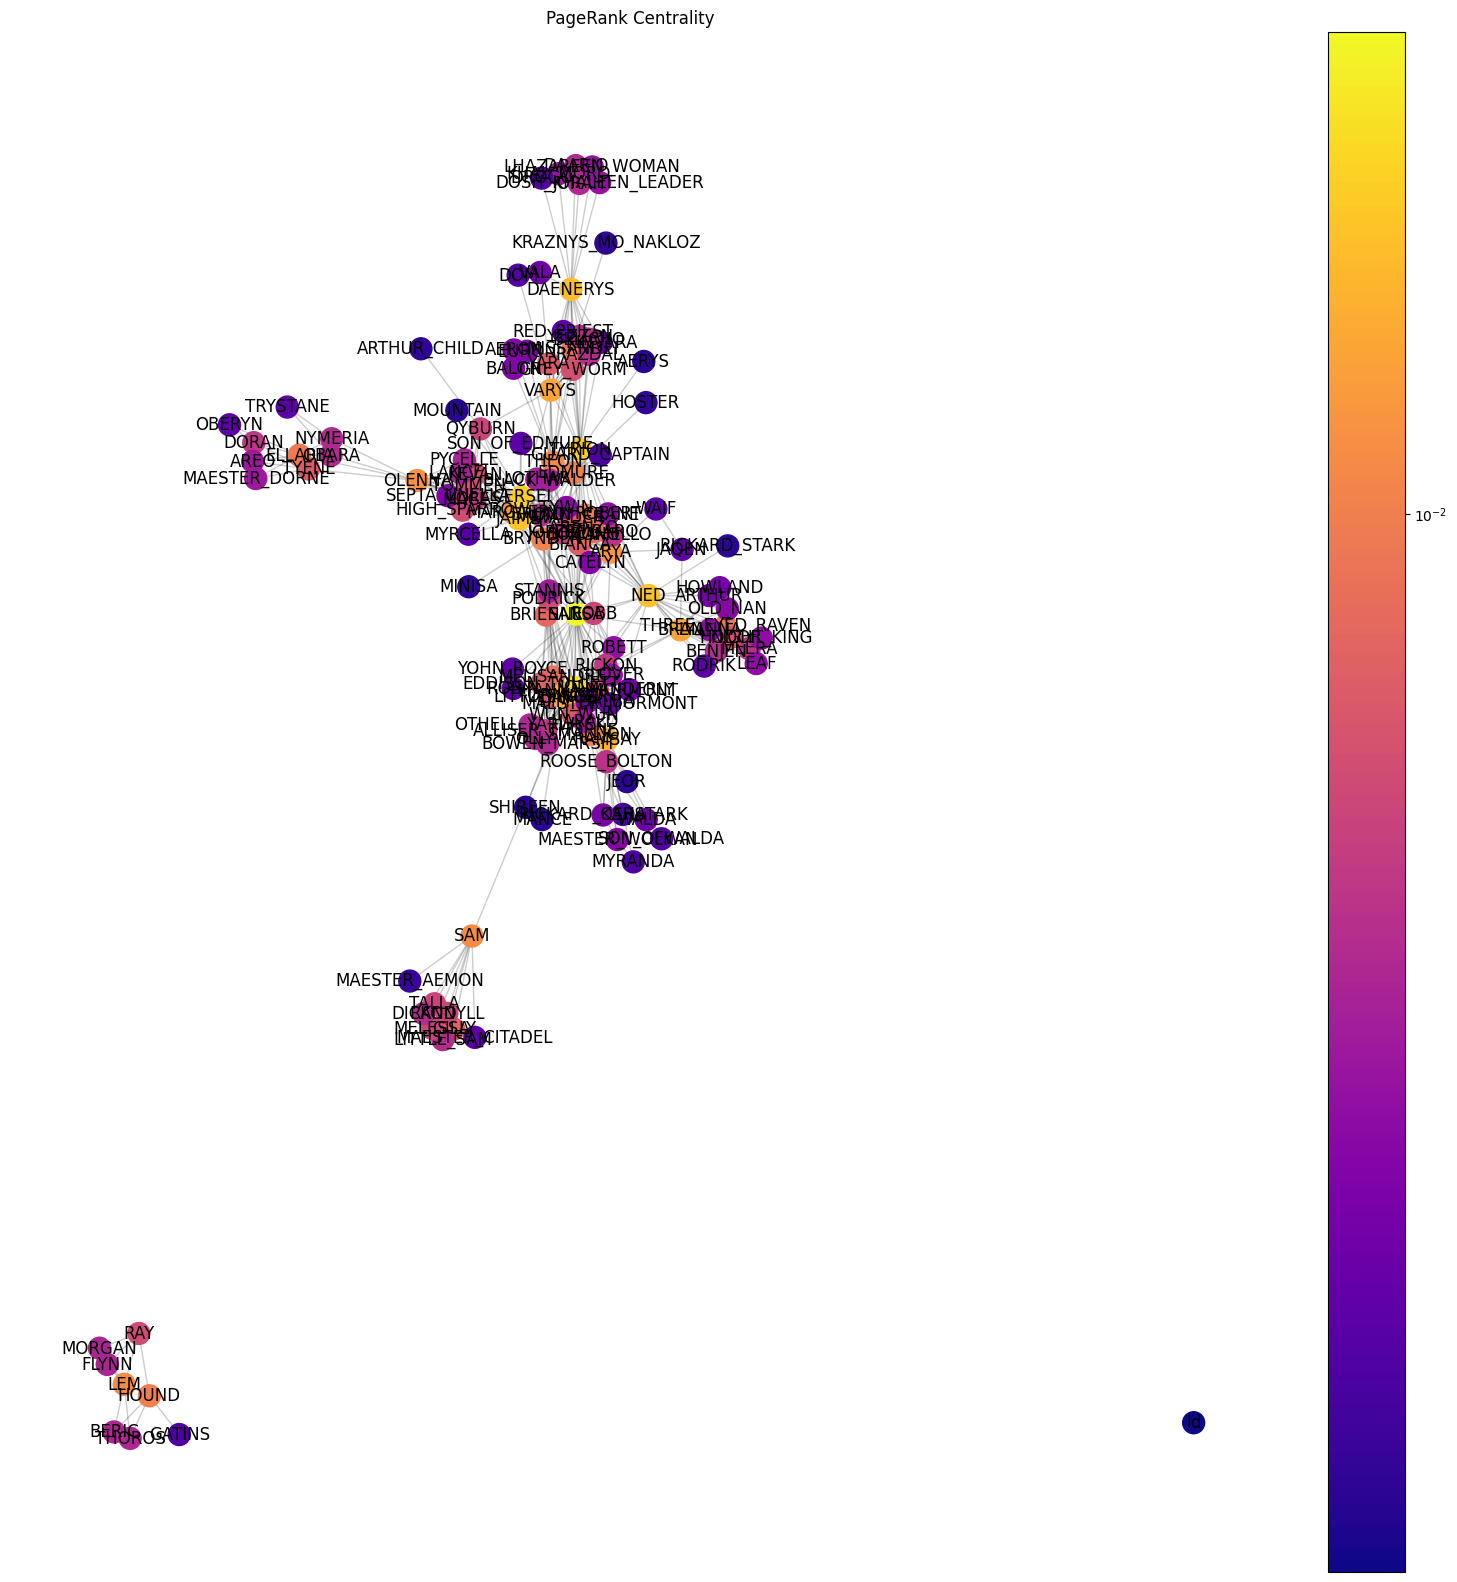

In [88]:
draw_net(g, pos, pagerank, 'PageRank Centrality')  # `pagerank` утгуудыг ашиглан графыг дүрслэнэ

In [89]:
eigen = nx.eigenvector_centrality(g)  # Графын бүх оройгийн Eigenvector Centrality утгыг тооцоолно

In [90]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]  # `eigenvector centrality` утгуудыг буурах дарааллаар эрэмбэлнэ
ranks[0:5]  # Хамгийн өндөр `eigenvector centrality`-тай эхний 5 оройг авна

[('SANSA', 0.3681703250620049),
 ('JON', 0.25752583885620856),
 ('DAVOS', 0.2120919196122236),
 ('TORMUND', 0.20473555675107596),
 ('TYRION', 0.200968439452155)]

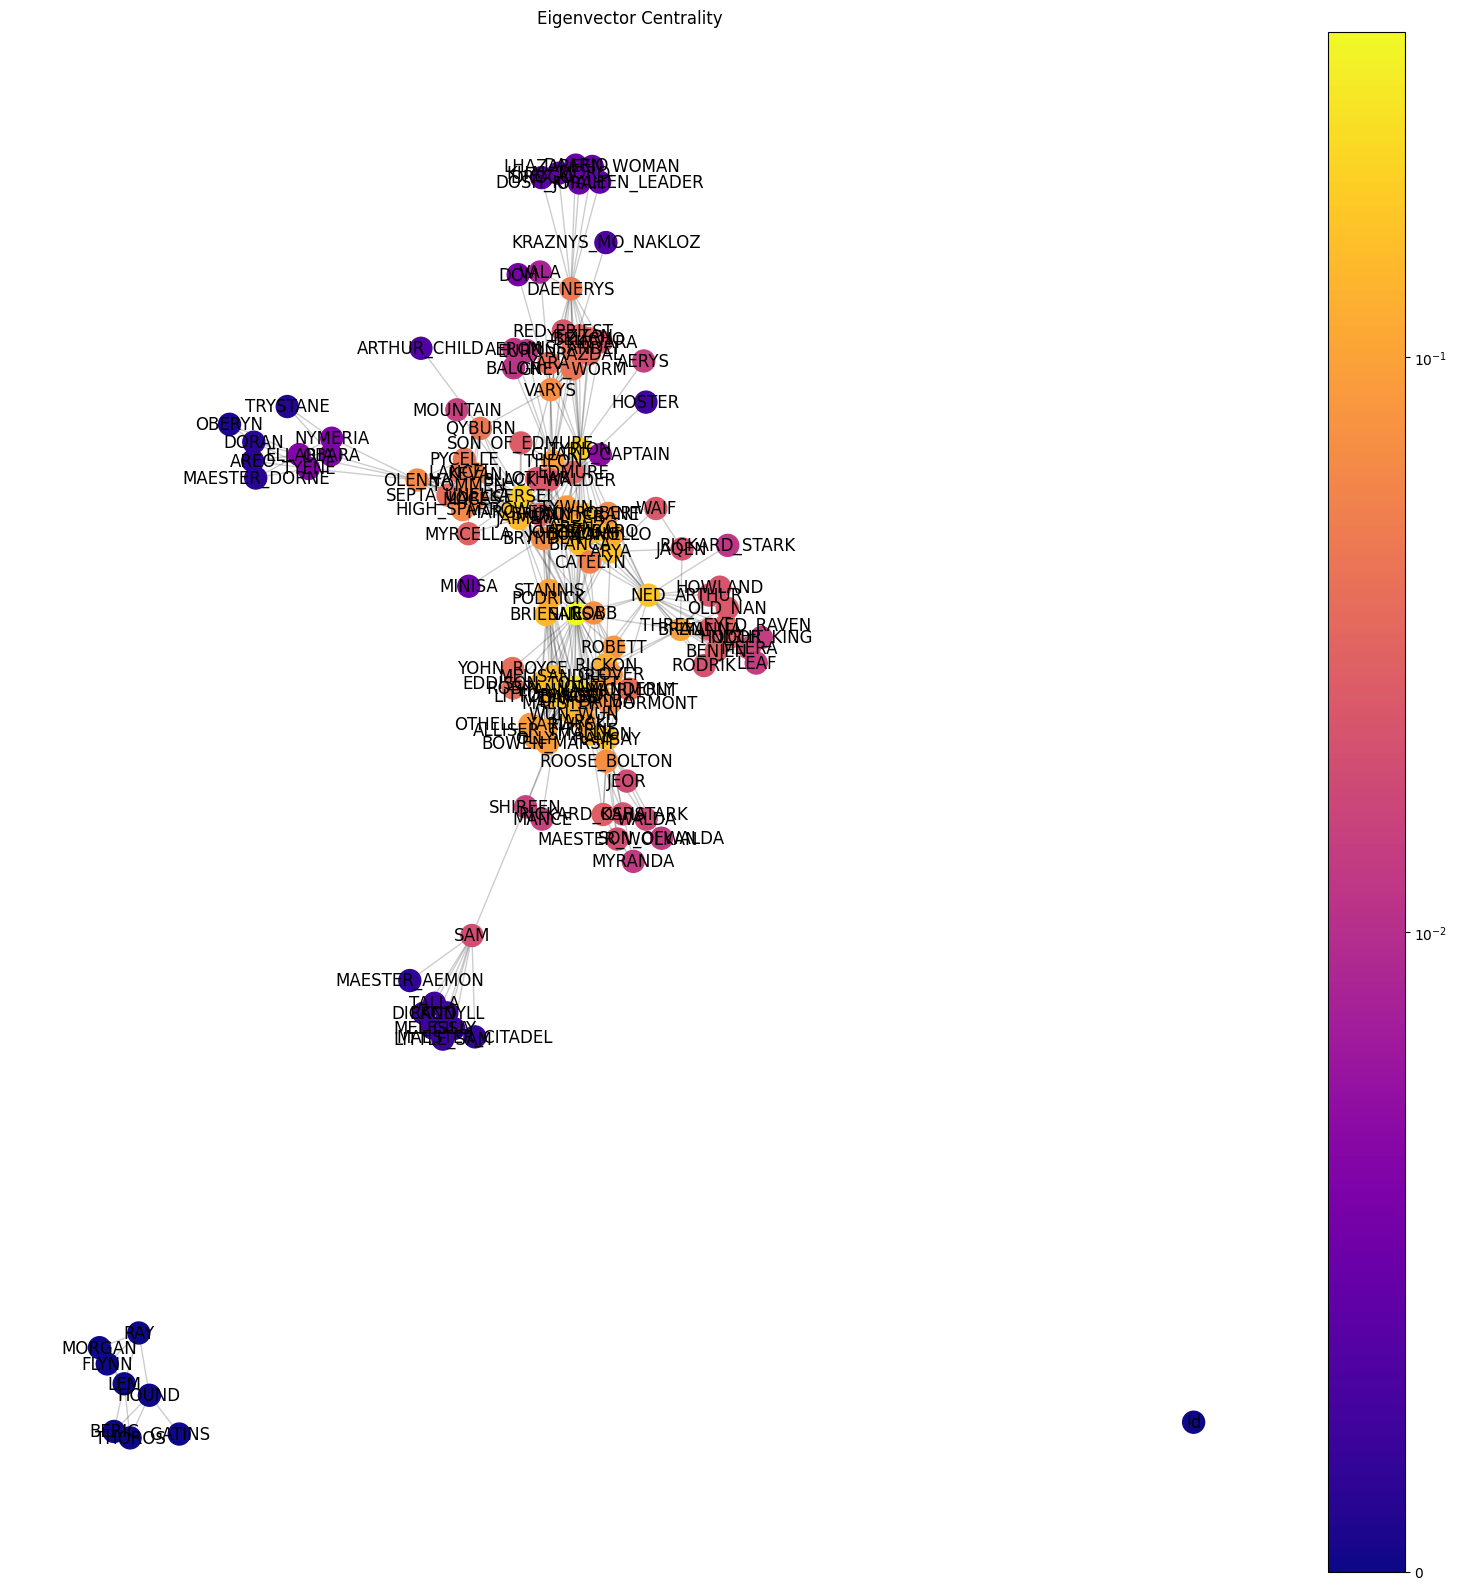

In [91]:
draw_net(g, pos, eigen, 'Eigenvector Centrality')  # `eigenvector centrality`-г ашиглан графыг дүрслэнэ

In [92]:
nx.degree_assortativity_coefficient(g)  # Графын оройнуудын зэрэг (degree)-ийн харьцааны зохицлын коэффициентийг тооцоолно

-0.006283179316286593

In [93]:
import networkx as nx  # NetworkX номын санг оруулна
print(nx.__version__)  # NetworkX номын сангийн хувилбарыг хэвлэнэ

3.4.2


In [94]:
knn = nx.average_degree_connectivity(g)  # Оройн зэрэг (degree) нь `k`-тай оройнуудын дундаж хамгийн ойр сусах оройн зэргийг тооцоолно
knn = dict(sorted(knn.items()))  # `k`-ийн утга дээр нь эрэмбэлж, `kn

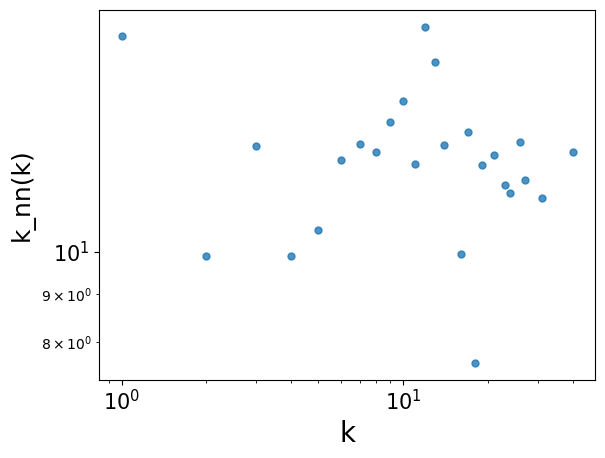

In [95]:
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)  # `k` ба `k_nn(k)` утгуудыг цэгийн хэлбэрээр зурна, ms - цэгийн хэмжээ, alpha - тод байдал
plt.loglog()  # Логарифм-график дээр өгөгдлийг зурна
plt.xlabel("k", fontsize=20)  # X талыг "k" гэж нэрлэнэ, font size 20
plt.ylabel("k_nn(k)", fontsize=18)  # Y талыг "k_nn(k)" гэж нэрлэнэ, font size 18
plt.xticks(fontsize=15)  # X талыг томьёолохдаа font size 15 ашиглана
plt.yticks(fontsize=15)  # Y талыг томьёолохдоо font size 15 ашиглана
plt.show()  # Графикийг харуулна

In [96]:
nx.attribute_assortativity_coefficient(g, 'house')  # Графын оройнуудын 'house' аттрибутаар зохицлын коэффициентийг тооцоолно

0.20747480547396624

In [97]:
h = g.copy()  # Граф `g`-г хуулбарлан шинэ граф `h`-ийг үүсгэнэ

In [98]:
!pip install --upgrade "pip<24.1"  # `pip`-ийн хувилбарыг 24.1-с доош шинэчилнэ
!pip install node_conformity  # `node_conformity` номын санг суулгана

DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to sugges

In [99]:
from conformity import attribute_conformity  # `attribute_conformity` функцыг оруулна
import pandas as pd  # Pandas номын санг оруулна

gcc = sorted(nx.connected_components(h), key=len, reverse=True)  # Граф `h`-ийн холбогдсон бүрэлдхүүнүүдийг (connected components) урт нь дарааллаар эрэмбэлнэ
h0 = h.subgraph(gcc[0])  # Хамгийн том холбогдсон бүрэлдхүүнээс дэд граф `h0` үүсгэнэ

alphas = [1.0, 2.0, 3.0, 4.0, 5.0]  # `decay factors` буюу бууралт хүчин зүйлүүд
res = attribute_conformity(h0, alphas, ['house'], profile_size=1)  # `attribute_conformity` тооцоолох, 'house' аттрибутын дагуу тохиргоог тооцно

100%|██████████| 134/134 [00:00<00:00, 187.59it/s]


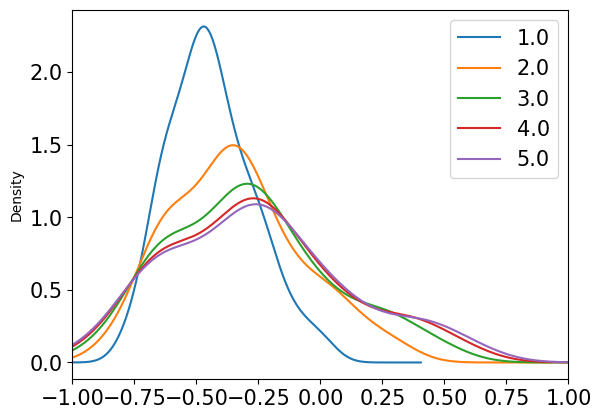

In [100]:
_, ax = plt.subplots()  # Шинэ график болон түүний талыг үүсгэнэ

for alpha, profiles in res.items():  # `res` доторх `alpha` болон түүний холбогдох профайлүүд дээр дамжин ажиллана
    for profile, data in profiles.items():  # Хэрэглэгчийн профайл болон түүний өгөгдлүүд дээр дамжин ажиллана
        df = pd.DataFrame(list(data.values()), columns=[alpha])  # `data`-г DataFrame болгон хувиргана
        df.plot.kde(ax=ax)  # `DataFrame` дээрх KDE (Kernel Density Estimation) график зурах

plt.xticks(fontsize=15)  # X талыг томьёолохдоо font size 15 ашиглана
plt.yticks(fontsize=15)  # Y талыг томьёолохдоо font size 15 ашиглана
plt.xlim((-1, 1))  # X талыг -1-с 1 хүртэл хязгаарлана
plt.legend(fontsize=15)  # LEGEND-ийг томьёолохдоо font size 15 ашиглана
plt.show()  # Графикийг харуулна

In [101]:
conf_a3 = res['3.0']['house']  # `res`-ээс '3.0' альфа утга болон 'house' профайлын тохиргоог авч, `conf_a3` хувьсагчид хадгална

In [102]:
node_assortativity = [(k, v) for k, v in sorted(conf_a3.items(), key=lambda item: item[1])]  # `conf_a3`-ийг буурах дарааллаар эрэмбэлж, түүнд хамаарах орой, утгуудыг хадгална

In [103]:
for nd in node_assortativity[0:5]:  # `node_assortativity` жагсаалтын эхний 5 элементийг дамжин өнгөрнө
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}")  # Оройн нэр, тохиргоо, мөн 'house' аттрибутын утгыг хэвлэнэ

                JEOR	-0.931038573874242	       Night's Watch
             SHIREEN	-0.9287300518300002	           Baratheon
               GILLY	-0.816164752888596	           Wildlings
        ARTHUR_CHILD	-0.8074085546571529	            Commoner
     MAESTER_CITADEL	-0.778874474317457	             Citadel


In [104]:
for nd in list(reversed(node_assortativity[-6:-1])):  # `node_assortativity` жагсаалтын сүүлийн 6-1 элементийг эргүүлж дамжин өнгөрнө
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}")  # Оройн нэр, тохиргоо, мөн 'house' аттрибутын утгыг хэвлэнэ

              LYANNA	0.48983121524161594	               Stark
       RICKARD_STARK	0.44896734570683966	               Stark
         SON_OFWALDA	0.4376999846379132	              Bolton
              BENJEN	0.3502922883738541	               Stark
               WALDA	0.33535527594258246	              Bolton


In [105]:
na = {c[0]: c[1] for c in node_assortativity}  # `node_assortativity` жагсаалтаас оройн нэр болон тохиргооны хосуудыг dictionary хэлбэрээр хадгална

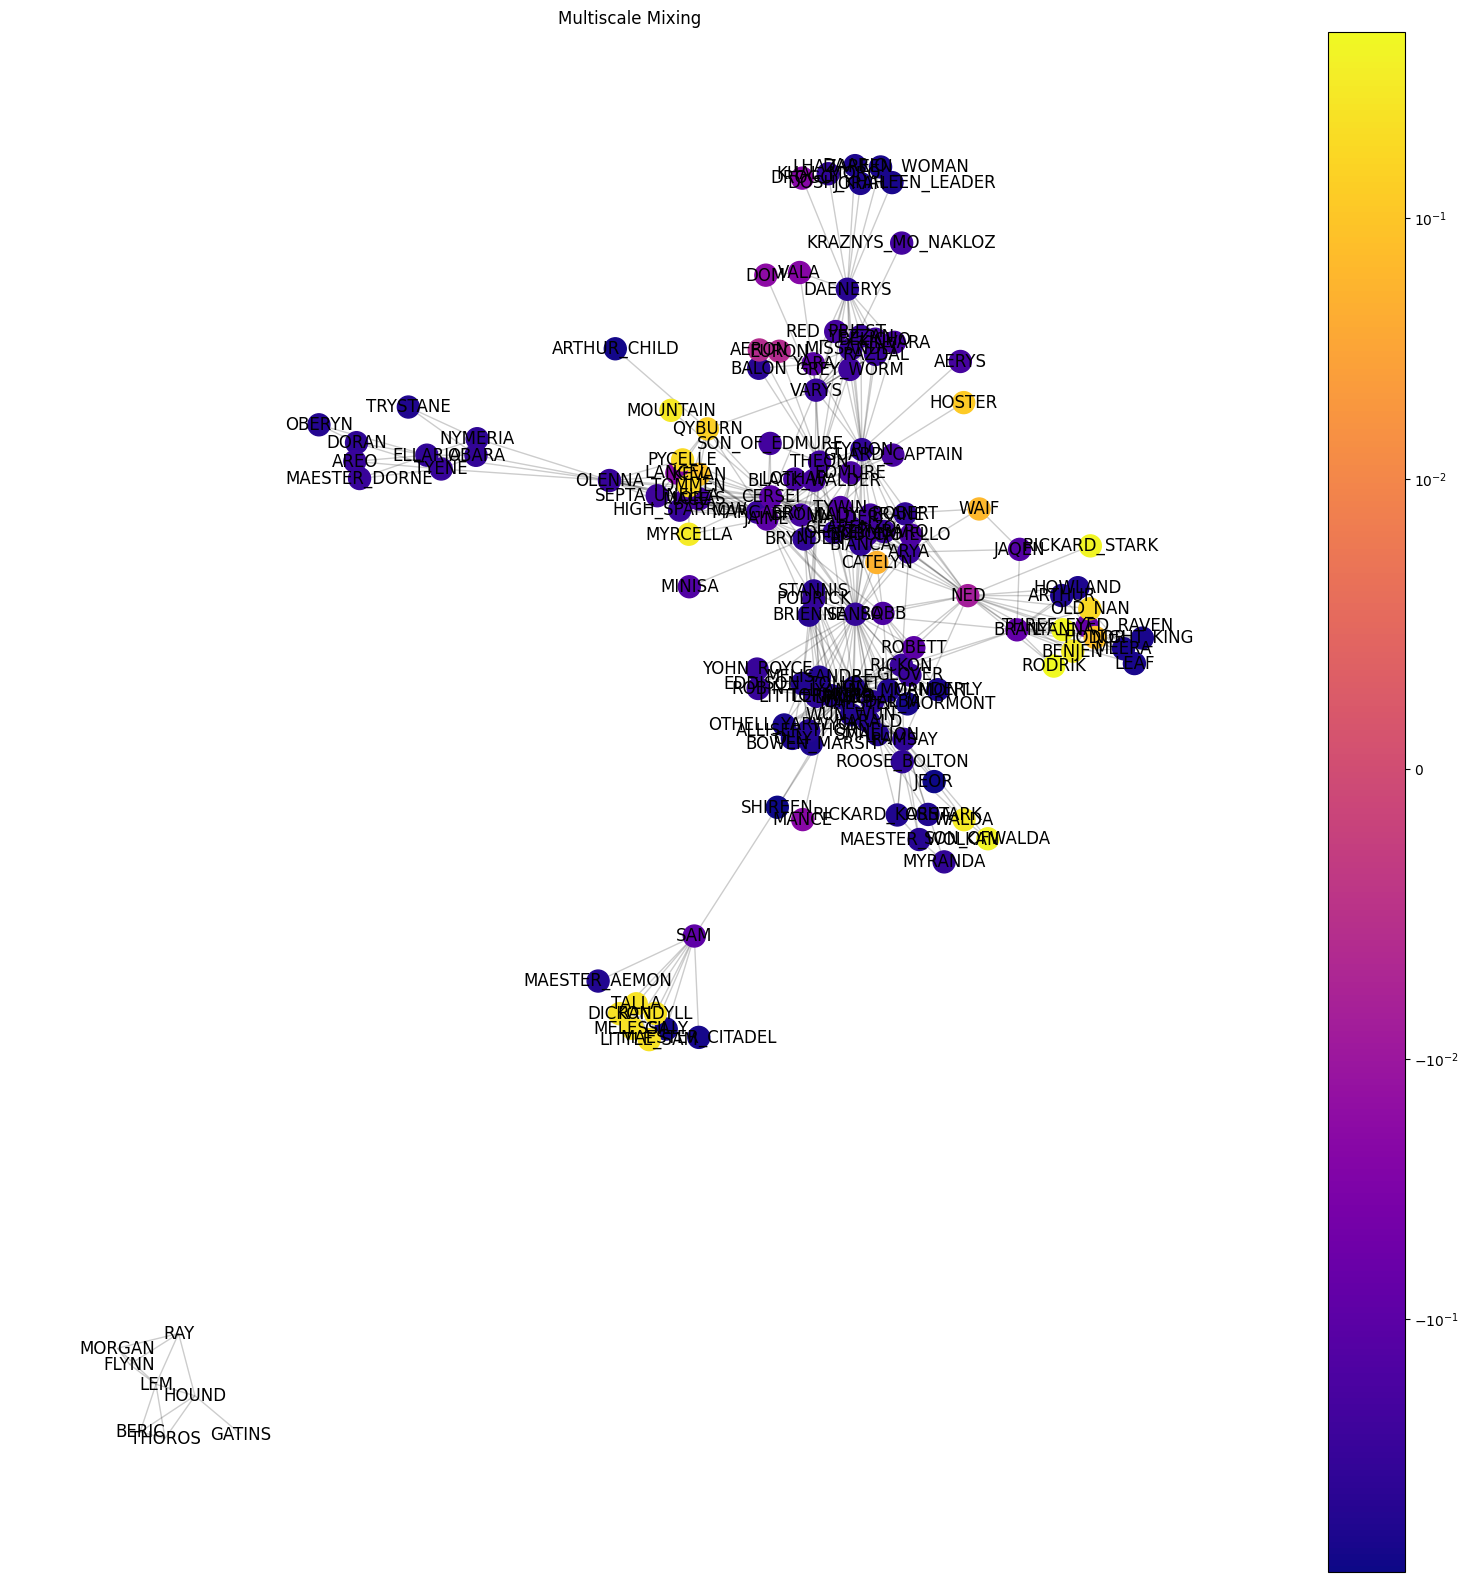

In [106]:
draw_net(h, pos, na, "Multiscale Mixing")  # `na` аттрибутын дагуу граф `h`-г дүрслэх, гарчиг нь "Multiscale Mixing"

In [108]:
import networkx as nx  # NetworkX санг импортлох
import pandas as pd  # Pandas санг импортлох

# ========== Undirected Graph (Чиглэлгүй граф) ==========
G = nx.Graph()  # Чиглэлгүй граф үүсгэх
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]  # Графын ирмэгүүд
G.add_edges_from(edges)  # Ирмэгүүдийг графд нэмэх

degree_centrality = nx.degree_centrality(G)  # Зэрэг төвшинг (degree centrality) тооцоолох

print("Degree Centrality for Undirected Graph:")  # Гарчиг хэвлэх
for node, centrality in degree_centrality.items():  # Бүх зангилааны зэрэг төвшинг хэвлэх
    print(f"Node {node}: {centrality:.4f}")  # Node ID болон түүний зэрэг төвшин

# ========== Directed Graph (Чиглэлтэй граф) ==========
DG = nx.DiGraph()  # Чиглэлтэй граф үүсгэх
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]  # Графын ирмэгүүд (чиглэлтэй)
DG.add_edges_from(edges)  # Ирмэгүүдийг чиглэлтэй графд нэмэх

in_degree_centrality = nx.in_degree_centrality(DG)  # Оролтын зэрэг төвшинг тооцоолох
out_degree_centrality = nx.out_degree_centrality(DG)  # Гаралтын зэрэг төвшинг тооцоолох

print("\nIn-Degree Centrality for Directed Graph:")  # Оролтын зэрэг төвшин хэвлэх гарчиг
for node, centrality in in_degree_centrality.items():  # Бүх зангилааны оролтын төвшинг хэвлэх
    print(f"Node {node}: {centrality:.4f}")  # Node ID болон түүний оролтын зэрэг төвшин

print("\nOut-Degree Centrality for Directed Graph:")  # Гаралтын зэрэг төвшин хэвлэх гарчиг
for node, centrality in out_degree_centrality.items():  # Бүх зангилааны гаралтын төвшинг хэвлэх
    print(f"Node {node}: {centrality:.4f}")  # Node ID болон түүний гаралтын зэрэг төвшин

# ========== Twitter Network Example (Жишээ: Twitter сүлжээ) ==========
try:
    df = pd.read_csv("/content/source_target_dataset.csv")  # CSV файлыг унших (source,target баганатай байх ёстой)
    G_twitter = nx.from_pandas_edgelist(df, source="source", target="target", create_using=nx.DiGraph())
    # CSV-ийн өгөгдлөөс чиглэлтэй граф үүсгэх

    degree_centrality = nx.degree_centrality(G_twitter)  # Төвшинг тооцоолох

    top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    # Хамгийн өндөр төвшингтэй 10 хэрэглэгчийг олох

    print("\nTop 10 Influencers based on Degree Centrality:")  # Топ 10 хэрэглэгч хэвлэх гарчиг
    for node, centrality in top_influencers:  # Шилдэг 10 хэрэглэгчийг хэвлэх
        print(f"User {node}: {centrality:.4f}")  # Хэрэглэгчийн ID болон түүний зэрэг төвшин

except FileNotFoundError:  # Хэрэв CSV файл олдохгүй бол
    print("\nError: '/content/source_target_dataset.csv' not found. Please ensure the file is in the correct directory.")
    # Алдааны мэдээлэл хэвлэх


Degree Centrality for Undirected Graph:
Node 1: 0.5000
Node 2: 0.7500
Node 3: 0.7500
Node 4: 0.7500
Node 5: 0.2500

In-Degree Centrality for Directed Graph:
Node 1: 0.2500
Node 2: 0.2500
Node 3: 0.2500
Node 4: 0.2500
Node 5: 0.2500

Out-Degree Centrality for Directed Graph:
Node 1: 0.2500
Node 2: 0.2500
Node 3: 0.5000
Node 4: 0.2500
Node 5: 0.0000

Top 10 Influencers based on Degree Centrality:
User Good morning: 0.2500
User Hello: 0.1250
User Hi: 0.1250
User How are you?: 0.1250
User I'm good, thanks!: 0.1250
User What's your name?: 0.1250
User My name is John.: 0.1250
User Goodbye: 0.1250
User See you later: 0.1250
